In [1]:
import numpy as np

raw_data = np.genfromtxt('./x09.txt', skip_header=36)
raw_data

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

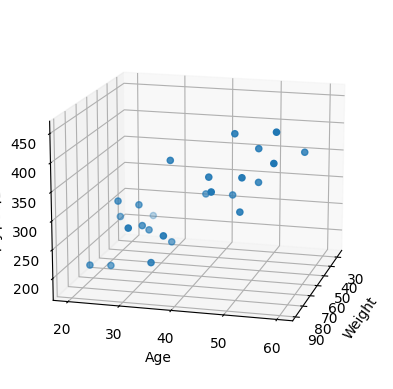

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

xs = np.array(raw_data[:,2], dtype=np.float32)
ys = np.array(raw_data[:,3], dtype=np.float32)
zs = np.array(raw_data[:,4], dtype=np.float32)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15,15)
plt.show()

In [4]:
x_data = np.array(raw_data[:,2:4], dtype=np.float32)
y_data = np.array(raw_data[:,4], dtype=np.float32)

y_data = y_data.reshape((25,1))

In [5]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2, )),
])

model.compile(optimizer='rmsprop', loss='mse')

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [7]:
y_data

array([[354.],
       [190.],
       [405.],
       [263.],
       [451.],
       [302.],
       [288.],
       [385.],
       [402.],
       [365.],
       [209.],
       [290.],
       [346.],
       [254.],
       [395.],
       [434.],
       [220.],
       [374.],
       [308.],
       [220.],
       [311.],
       [181.],
       [274.],
       [303.],
       [244.]], dtype=float32)

In [8]:
hist = model.fit(x_data, y_data, epochs=5000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 12ms/step - loss: 5561.5518
Epoch 2502/5000
1/1 [==============================] - 0s 22ms/step - loss: 5551.3521
Epoch 2503/5000
1/1 [==============================] - 0s 18ms/step - loss: 5541.1748
Epoch 2504/5000
1/1 [==============================] - 0s 11ms/step - loss: 5531.0249
Epoch 2505/5000
1/1 [==============================] - 0s 20ms/step - loss: 5520.8965
Epoch 2506/5000
1/1 [==============================] - 0s 10ms/step - loss: 5510.7920
Epoch 2507/5000
1/1 [==============================] - 0s 8ms/step - loss: 5500.7104
Epoch 2508/5000
1/1 [==============================] - 0s 11ms/step - loss: 5490.6558
Epoch 2509/5000
1/1 [==============================] - 0s 8ms/step - loss: 5480.6221
Epoch 2510/5000
1/1 [==============================] - 0s 13ms/step - loss: 5470.6123
Epoch 2511/5000
1/1 [==============================] - 0s 7ms/step - loss: 5460.6279
Epoch 2512/5000
1/1 [=

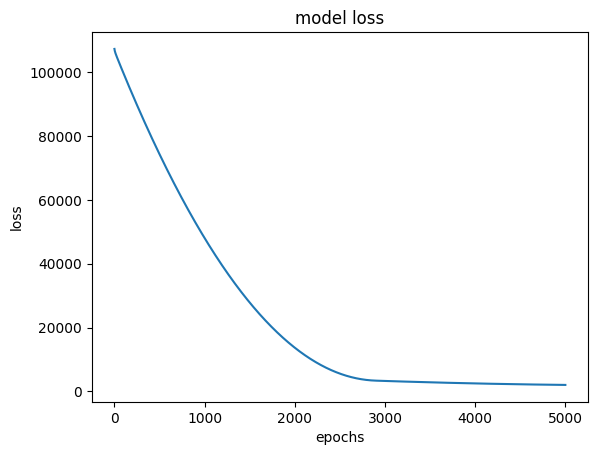

In [9]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [10]:
model.predict(np.array([100,44]).reshape(1,2))

1/1 [==============================] - 0s 381ms/step


array([[386.9965]], dtype=float32)

In [12]:
model.predict(np.array([60,25]).reshape(1,2))

1/1 [==============================] - 0s 21ms/step


array([[227.80644]], dtype=float32)

In [13]:
W_, b_ = model.get_weights()
print('Weight is : ', W_)
print('bias is : ', b_)

Weight is :  [[1.8159113]
 [4.555452 ]]
bias is :  [4.965475]


In [14]:
x = np.linspace(20, 100, 50).reshape(50,1)
y = np.linspace(10, 70, 50).reshape(50,1)

X = np.concatenate((x, y), axis=1)
Z = np.matmul(X, W_) + b_

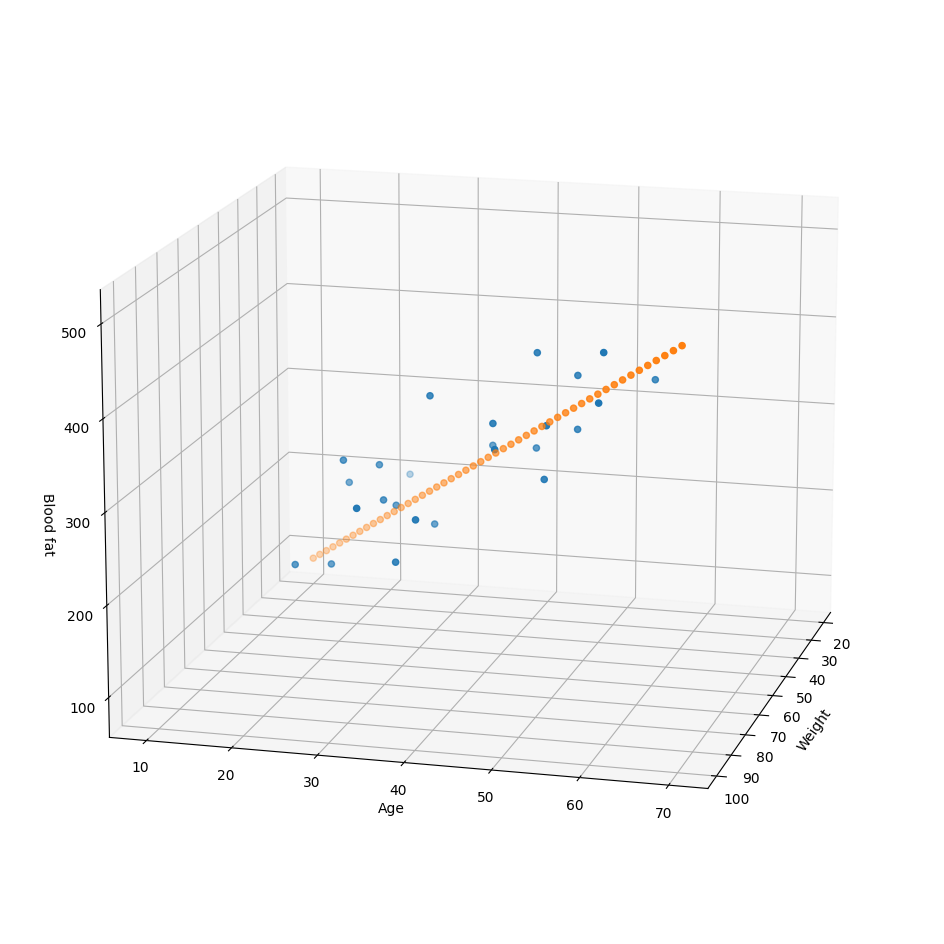

In [15]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.scatter(x, y, Z)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15,15)
plt.show()

In [16]:
import numpy as np

X = np.array([ [0, 0],
               [1, 0],
               [0, 1],
               [1, 1] ])
y = np.array([[0], [1], [1], [0]])

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [21]:
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [23]:
hist = model.fit(X, y, epochs=5000, batch_size=1)

Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 0s 4ms/step - loss: 0.2500
Epoch 2502/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.2500
Epoch 2503/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.2500
Epoch 2504/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.2500
Epoch 2505/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.2499
Epoch 2506/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.2499
Epoch 2507/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.2500
Epoch 2508/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.2499
Epoch 2509/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2499
Epoch 2510/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2499
Epoch 2511/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2499
Epoch 2512/5000
4/4 [==============================] - 0s 5ms/s

In [24]:
model.predict(X)

1/1 [==============================] - 0s 164ms/step


array([[0.51229334],
       [0.4748154 ],
       [0.5251694 ],
       [0.4794125 ]], dtype=float32)

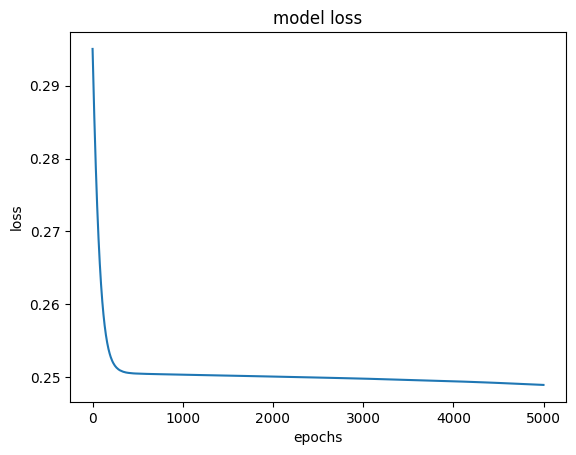

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [26]:
for w in model.weights:
  print('---')
  print(w)

---
<tf.Variable 'dense_1/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[ 0.0208066,  1.3176029],
       [ 0.4737051, -0.6963709]], dtype=float32)>
---
<tf.Variable 'dense_1/bias:0' shape=(2,) dtype=float32, numpy=array([-0.12861751,  0.35818392], dtype=float32)>
---
<tf.Variable 'dense_2/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-0.41558987],
       [-0.58268285]], dtype=float32)>
---
<tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([0.5866012], dtype=float32)>


In [27]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='mse')

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [29]:
hist = model.fit(X, y, epochs=10000, batch_size=1)

Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 7502/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 7503/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 7504/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0024
Epoch 7505/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0024
Epoch 7506/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0024
Epoch 7507/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0024
Epoch 7508/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0024
Epoch 7509/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 7510/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 7511/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 7512/10000
4/4 [==============================]

In [30]:
model.predict(X)

1/1 [==============================] - 0s 82ms/step


array([[0.03866917],
       [0.9564284 ],
       [0.9570698 ],
       [0.03496046]], dtype=float32)

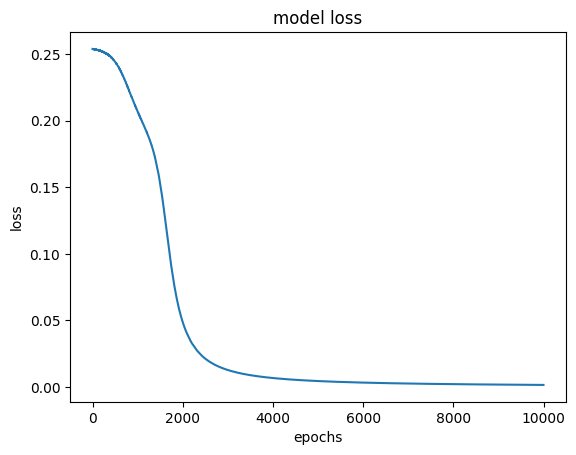

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [32]:
for w in model.weights:
  print('---')
  print(w)

---
<tf.Variable 'dense_1/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[-5.7551684,  6.6340814],
       [ 6.0055733, -6.52966  ]], dtype=float32)>
---
<tf.Variable 'dense_1/bias:0' shape=(2,) dtype=float32, numpy=array([2.9010463, 3.3495889], dtype=float32)>
---
<tf.Variable 'dense_2/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-7.327922 ],
       [-7.2323565]], dtype=float32)>
---
<tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([10.719965], dtype=float32)>


In [33]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

In [34]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [35]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
enc.fit(y.reshape(len(y), 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [36]:
enc.categories_

[array([0, 1, 2])]

In [37]:
y_onehot = enc.transform(y.reshape(len(y), 1))
y_onehot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot,
                                                    test_size=0.2,
                                                    random_state=13)

In [41]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape=(4, ), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
])

In [42]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 32)                160       
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 32)                1056      
                                                                 
 dense_10 (Dense)            (None, 3)                 99        
                                                                 
Total params: 2,371
Trainable params: 2,371
Non-trainable params: 0
_________________________________________________________________


In [43]:
hist = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 2s 6ms/step - loss: 1.2956 - accuracy: 0.3917
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 1.0921 - accuracy: 0.6750
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 0.9649 - accuracy: 0.6917
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9006 - accuracy: 0.6500
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 0.8362 - accuracy: 0.6500
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 0.7919 - accuracy: 0.6500
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7440 - accuracy: 0.6667
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6996 - accuracy: 0.7333
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6601 - accuracy: 0.8583
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6212 - accuracy: 0.9250
Epoch 11/100
4/4 [==========

In [45]:
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.0774 - accuracy: 1.0000 - 30ms/epoch - 30ms/step


[0.0774470791220665, 1.0]

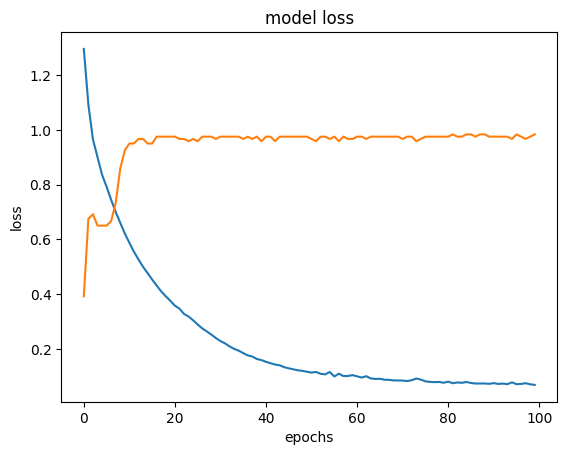

In [46]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()